# Homework2

Please upload to Moodle a .zip archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a requirements.txt file which lists all the packages that you have used for your homework, one package per line (e.g., pandas). This will allow us to install all required packages in one go, by using "pip install -r requirements.txt".

Please name your .zip archive using your full name and student id as follows - *Firstnme_Lastname_12345678_COMP47350_Homework2.zip*. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Moodle.

Your code and analysis is like a story that awaits to be read, make it a nice story please!

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    - .txt
    - .html
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will be ignored and not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Sunday, April 16, 2017, midnight.** 

## Exercises

This homework focuses on building and evaluating prediction models for a particular problem and dataset.
The problem and data come from the Amazon online shopping platform. Several sellers can sell the same product on Amazon. Based on the data provided by the seller to Amazon (seller reputation, product price, shipping details, etc) Amazon ranks seller offers from best to worst for a given product. This ranking is mostly influenced by the product price offer of the seller, but it can also be influenced by other features. We first need to understand which features are most indicative of a seller being ranked first by Amazon for a product. When the seller is ranked first for a product we say that the seller is the 'winner' among all the offers, because their offer is shown first when a user searches for a product on Amazon, which increases their chances of selling the product. Our goal is to work with the data to build and evaluate prediction models that capture the relationship between descriptive features and the target feature 'IsWinner'.

We use the same dataset from Homework1 (you can use your cleaned/prepared CSV or the raw dataset), a CSV file describing offers by given sellers for given products and a column which records whether an offer was a winner or not.

(1). [25] Data Understanding: Exploring relationships between feature pairs:
    - (1.1) [5] Print the correlations between the continuous features.
    - (1.2) [5] Plot the scatter plots of each pair of continuous descriptive feature and target feature.
    - (1.3) [5] Discuss what you observe from the scatter plots and correlations, e.g., which continuous features seem to be better at predicting the target feature. Choose a subset of continuous features you find promising. Justify your choices.
    - (1.4) [5] For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots).
    - (1.5) [5] Discuss what knowledge you gain from plotting the interaction of descriptive categorical features and the target feature, e.g., which categorical features seem to be better at predicting the target feature. Choose a subset of categorical features you find promising. Justify your choices.
    
(2). [15] Predictive Modeling: Linear Regression  
    - (2.1) [5] Train a linear regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (2.2) [2.5] Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).    
    - (2.3) [2.5] Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set.
    - (2.4) [5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Threshold the predicted target feature value at 0.5 to get the predicted class for each example. 

(3). [15] Predictive Modeling: Logistic Regression  
    - (3.1) [5] Train a logistic regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (3.2) [5] Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).    
    - (3.3) [2.5] Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set.
    - (3.4) [2.5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.
    
(4). [20] Predictive Modeling: Random Forest 
    - (4.1) [5] Train a random forest model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (4.2) [5] Print the features ranked by random forest importance. Discuss your findings and choose a subset of features you find promising.
    - (4.3) [5] Retrain the model using only the subset of features found to be promising. Evaluate the quality of the model on the training set.
    - (4.4) [5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.
    
(5). [25] Evaluating Predictive Models
    - (5.1) [10] Split the dataset into 70% training and remaining 30% test. Train all models from the previous exercises using the new training set and evaluate their quality on the new test set. Print classification evaluation metrics for all models on the test set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1). Discuss how does evaluation on the test set compare to evaluation using the full data for training and also for testing.
    - (5.2) [15] Summarize and try to improve your results so far:
        - (5.2.1) [5] Which model performs best and is it more accurate than a simple (but useless) model that always predicts IsWinner=0? Justify your answers.
        - (5.2.2) [10] Discuss your understanding of the problem and predictive modeling results so far. Can you find any tricks to improve the best model so far (e.g., using feature significance, feature re-scaling, creating new features, combining models, or other knowledge)?

# 1.Data Understanding
## Exploring relationships between feature pairs

In [1]:
#Import the required packages

#Import package pandas for data analysis
import pandas as pd

# Import package numpy for numeric computing
import numpy as np

# Import package matplotlib  for visualisation/plotting
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

#import package matplotlib for import plots to PDF
from matplotlib.backends.backend_pdf import PdfPages


# Allows plots to appear directly in the notebook.
%matplotlib inline

#import package seaborn for visualisation
import seaborn as sns

# Reading from a csv file, into a data frame
df_raw = pd.read_csv('amazon-offers-10k-samples-raw.csv')
df_clean = pd.read_csv('amazon_clean_data.csv')
df_clean.head()

,Unnamed: 0,IsWinner,ProductId,TimeOfOfferChange,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours
0,0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,1,94.00,0,0,1207135739277432339,0.00,672,1008
1,1,1,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,107.35,95,4078,-1789487307643024748,0.00,48,72
2,2,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,100.46,98,478,5452082314297826053,6.99,24,48
3,3,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,99.24,95,4384,-2572277640783537773,11.67,24,48
4,4,0,-4885255916155087854,2016-02-04T04:26:52.136Z,0,0,109.48,94,105,-8704029307873847986,8.99,24,48


In [2]:
#import sklearn for LogisticRegression
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

#import sklearn for RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/Users/April/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#Found the first line showed the column we don't need, so drop it 
df_clean.drop(['Unnamed: 0'],axis=1, inplace=True)

In [4]:
df_clean.head()

,IsWinner,ProductId,TimeOfOfferChange,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours
0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,1,94.00,0,0,1207135739277432339,0.00,672,1008
1,1,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,107.35,95,4078,-1789487307643024748,0.00,48,72
2,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,100.46,98,478,5452082314297826053,6.99,24,48
3,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,99.24,95,4384,-2572277640783537773,11.67,24,48
4,0,-4885255916155087854,2016-02-04T04:26:52.136Z,0,0,109.48,94,105,-8704029307873847986,8.99,24,48


In [5]:
df_clean.shape

(9886, 12)

### 1.1Print the correlations between the continuous features.

In [6]:
#Find all the continuous features 

continuous_columns=df_clean[['ListingPrice','SellerFeedbackRating','SellerFeedbackCount','ShippingPrice',
                       'ShippingTime_minHours','ShippingTime_maxHours']].columns

#df[continuous_columns].dtypes
# Descriptive stats for continuous features
#df[continuous_columns].describe().T

# Look at correlations for all the continuous features.
df_clean[continuous_columns].corr()

,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours
ListingPrice,1.000000,0.034981,-0.033080,0.150274,0.000290,-0.000209
SellerFeedbackRating,0.034981,1.000000,0.167111,0.060349,-0.375718,-0.381365
SellerFeedbackCount,-0.033080,0.167111,1.000000,-0.067493,-0.001627,-0.030522
ShippingPrice,0.150274,0.060349,-0.067493,1.000000,0.019246,0.019848
ShippingTime_minHours,0.000290,-0.375718,-0.001627,0.019246,1.000000,0.992427
ShippingTime_maxHours,-0.000209,-0.381365,-0.030522,0.019848,0.992427,1.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text yticklabel objects>)

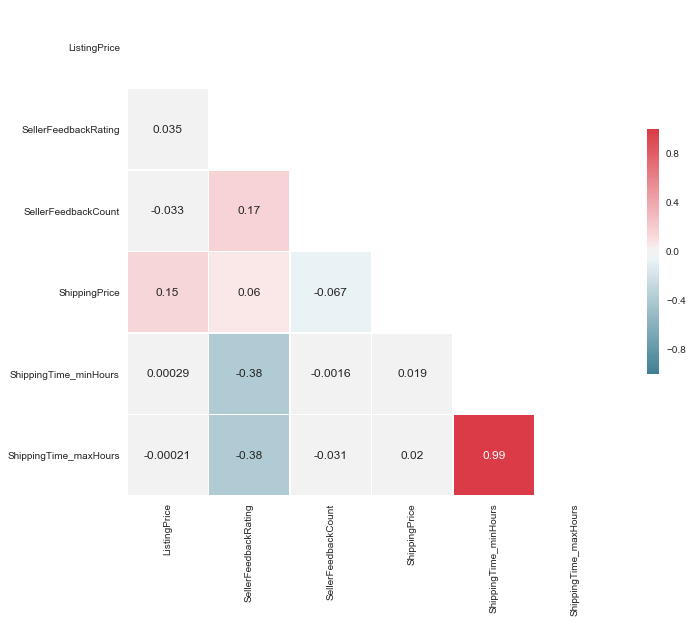

In [7]:
#Plot the  correlations between the continuous features
sns.set(style="white")

corr = df_clean[continuous_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)

In [8]:
df=df_clean

df.insert(0,"Rating_score", df.SellerFeedbackRating * df.SellerFeedbackCount)
df.head()

,Rating_score,IsWinner,ProductId,TimeOfOfferChange,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours
0,0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,1,94.00,0,0,1207135739277432339,0.00,672,1008
1,387410,1,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,107.35,95,4078,-1789487307643024748,0.00,48,72
2,46844,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,100.46,98,478,5452082314297826053,6.99,24,48
3,416480,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,99.24,95,4384,-2572277640783537773,11.67,24,48
4,9870,0,-4885255916155087854,2016-02-04T04:26:52.136Z,0,0,109.48,94,105,-8704029307873847986,8.99,24,48


In [9]:
#Range normalise all columns
#For different products, we groupby them first 

zscore = lambda x: (x - x.min()) /( x.max()-x.min())
#df['ListingPrice']=df_clean.groupby('ProductId','TimeOfOfferChange')['ListingPrice'].transform(zscore)
df['ListingPrice']=df.groupby('ProductId')['ListingPrice'].transform(zscore)
df['SellerFeedbackRating']=df.groupby('ProductId')['SellerFeedbackRating'].transform(zscore)
df['SellerFeedbackCount']=df.groupby('ProductId')['SellerFeedbackCount'].transform(zscore)
df['ShippingPrice']=df.groupby('ProductId')['ShippingPrice'].transform(zscore)
df['ShippingTime_minHours']=df.groupby('ProductId')['ShippingTime_minHours'].transform(zscore)
df['ShippingTime_maxHours']=df.groupby('ProductId')['ShippingTime_maxHours'].transform(zscore)
df['ShippingTime_maxHours']=df.groupby('ProductId')['Rating_score'].transform(zscore)
df.head()


,Rating_score,IsWinner,ProductId,TimeOfOfferChange,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours
0,0,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,1,0.000000,0.00,0.000000,1207135739277432339,0.000000,1.000000,0.000000
1,387410,1,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,0.235077,0.95,0.098455,-1789487307643024748,0.000000,0.037037,0.097429
2,46844,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,0.113752,0.98,0.011540,5452082314297826053,0.466311,0.000000,0.011781
3,416480,0,-4885255916155087854,2016-02-04T04:26:52.136Z,1,0,0.092270,0.95,0.105843,-2572277640783537773,0.778519,0.000000,0.104740
4,9870,0,-4885255916155087854,2016-02-04T04:26:52.136Z,0,0,0.272583,0.94,0.002535,-8704029307873847986,0.599733,0.000000,0.002482


In [10]:
#Add the target feature, we print the 
df_continue=df[['ListingPrice','SellerFeedbackRating','SellerFeedbackCount','ShippingPrice',
                       'ShippingTime_minHours','ShippingTime_maxHours','IsWinner']]
df_continue.corr()

,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,IsWinner
ListingPrice,1.000000,0.062829,0.025886,-0.060375,-0.010152,0.023802,-0.243341
SellerFeedbackRating,0.062829,1.000000,0.145440,0.093869,0.003115,0.147288,-0.276790
SellerFeedbackCount,0.025886,0.145440,1.000000,-0.144916,0.126780,0.999805,-0.039756
ShippingPrice,-0.060375,0.093869,-0.144916,1.000000,0.077376,-0.146146,-0.147019
ShippingTime_minHours,-0.010152,0.003115,0.126780,0.077376,1.000000,0.128211,-0.075646
ShippingTime_maxHours,0.023802,0.147288,0.999805,-0.146146,0.128211,1.000000,-0.038282
IsWinner,-0.243341,-0.276790,-0.039756,-0.147019,-0.075646,-0.038282,1.000000


### 1.2 Plot the scatter plots of each pair of continuous descriptive feature and target feature


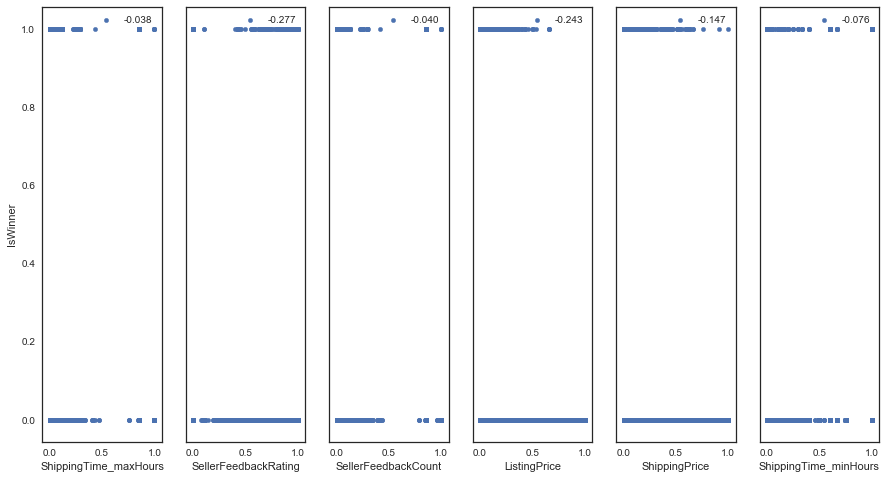

In [11]:
fig, axs = plt.subplots(1, 6, sharey=True)
df.plot(kind='scatter', x='ShippingTime_maxHours', y='IsWinner', label="%.3f" % df[['ShippingTime_maxHours', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))
df.plot(kind='scatter', x='SellerFeedbackRating', y='IsWinner', label="%.3f" % df[['SellerFeedbackRating', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[1])
df.plot(kind='scatter', x='SellerFeedbackCount', y='IsWinner', label="%.3f" % df[['SellerFeedbackCount', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[2])
df.plot(kind='scatter', x='ListingPrice', y='IsWinner', label="%.3f" % df[['ListingPrice', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[3])
df.plot(kind='scatter', x='ShippingPrice', y='IsWinner', label="%.3f" % df[['ShippingPrice', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[4])
df.plot(kind='scatter', x='ShippingTime_minHours', y='IsWinner', label="%.3f" % df[['ShippingTime_minHours', 'IsWinner']].corr().as_matrix()[0,1], ax=axs[5])
plt.show()

### 1.3 Analysis Data
question:  Discuss what you observe from the scatter plots and correlations, e.g., which continuous features seem to be better at predicting the target feature. Choose a subset of continuous features you find promising. Justify your choices.

Answer: 
As we could see from the scatter plots, SellerFeedbackRating and ListingPrice have the highest correlations to target feature. These two features are better at predicting the target feature. 

In the correlations between the continuous features we could see that ShippingTime_minHours  and ShippingTime_maxHour
have very high correlation:0.992427, after normolation, it is almost the same. The two features have the same affection to the target feature, so it needs to choose one of them. Here I will choose the ShippingTime_maxHour, first, it has higher correlation to the target feature. Second from business side, I think it is importtant to know the maximum delivery time.  

Then we could see that SellerFeedbackCount's correlation to target feature is only -0.039756, it is too close to 0, so we will not use it. 
At end the continuous features I chose are SellerFeedbackRating + ListingPrice +ShippingPrice+ShippingTime_maxHours

### 1.4 Plot categorical features with target feature 
For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots).

In [12]:
#Find all the categorical features 
categorical_columns = df[['IsWinner','IsFeaturedMerchant',
                         'IsFulfilledByAmazon']].columns

(0, 100)

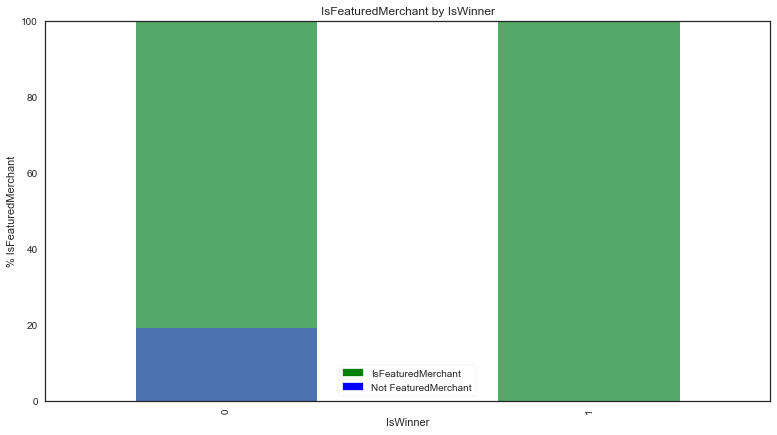

In [13]:
# Count the number of winner 
winner_count = 1 / df[df.IsWinner == 1].count()['IsWinner']


# Counts the number of male candidates
not_Winner_count = 1 / df[df.IsWinner == 0].count()['IsWinner']

# Create a new column in the dataframe called percent and insert male_count in all cells
df['percent'] = winner_count * 100

# Find indexes of all rows containing value Female for Gender
index_list = df[df['IsWinner'] == 0].index.tolist()

# For each row with a 'female' value, insert female_count in the percent column
for i in index_list:
    df.loc[i, 'percent'] = not_Winner_count * 100

# Group dataframe by Gender and Elected and sum precent
category_group = df[['percent','IsWinner','IsFeaturedMerchant']].groupby(['IsWinner','IsFeaturedMerchant']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="IsFeaturedMerchant by IsWinner", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='IsFeaturedMerchant')
blue_patch = mpatches.Patch(color='blue', label='Not FeaturedMerchant')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("IsWinner")
my_plot.set_ylabel("% IsFeaturedMerchant")
my_plot.set_ylim([0,100])


(0, 100)

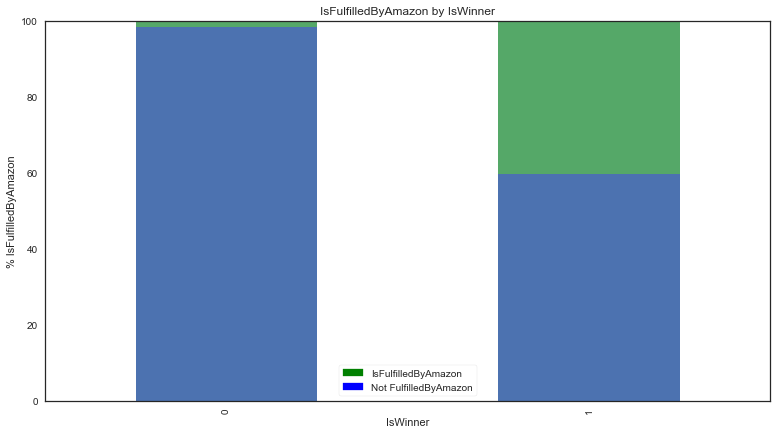

In [14]:
# Group dataframe by Gender and Elected and sum precent
category_group = df[['percent','IsWinner','IsFulfilledByAmazon']].groupby(['IsWinner','IsFulfilledByAmazon']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="IsFulfilledByAmazon by IsWinner", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='IsFulfilledByAmazon')
blue_patch = mpatches.Patch(color='blue', label='Not FulfilledByAmazon')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("IsWinner")
my_plot.set_ylabel("% IsFulfilledByAmazon")
my_plot.set_ylim([0,100])


### 1.5 Analysis Data Understanding

Question:  Discuss what knowledge you gain from plotting the interaction of descriptive categorical features and the target feature, e.g., which categorical features seem to be better at predicting the target feature. Choose a subset of categorical features you find promising. Justify your choices.


Answer: 
From the plots we could see that IsFulfilledByAmazon is better to predict the target feature. Because When IsWinner feature equal to 1, IsFeaturedMerchant feature  is always the same value 1. As both features have related to target feature, I kept both of them. 

# 2.Predictive Modeling: Linear Regression

### 2.1 Train a linear regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   

In [30]:
#Import statsmodels package for training a linear regression model.
import statsmodels.formula.api as sm

# Train the model
lm = sm.ols(formula="IsWinner ~  SellerFeedbackRating + ListingPrice +ShippingPrice+ShippingTime_maxHours+IsFulfilledByAmazon+IsFeaturedMerchant", data=df).fit()

# Print the weights learned for each feature.
print(lm.params)

Intercept                0.090401
SellerFeedbackRating    -0.031337
ListingPrice            -0.135204
ShippingPrice           -0.061845
ShippingTime_maxHours   -0.012599
IsFulfilledByAmazon      0.469942
IsFeaturedMerchant       0.056710
dtype: float64


In [31]:
# Only feature Size is found to be statistically significant (p-value is smaller than 0.05, p-value=0).
# If the 95% confidence interval includes zero, the p-value for that coefficient will be greater than 0.05.
# Print the summary of the trained model and analysis the result
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               IsWinner   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     577.3
Date:                Tue, 25 Apr 2017   Prob (F-statistic):               0.00
Time:                        15:43:44   Log-Likelihood:                 2046.5
No. Observations:                9886   AIC:                            -4079.
Df Residuals:                    9879   BIC:                            -4029.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.09

In [32]:
# df_input is the input for the model 
df_input=df[['ListingPrice','SellerFeedbackRating','ShippingPrice','ShippingTime_maxHours','IsFulfilledByAmazon','IsFeaturedMerchant']]

# predicted is the result of the model predicted for all the data in
predicted=lm.predict(df_input)

predictions=[]

for i in predicted:
    if i>0.5:
        predictions.append(1)
    else:
        predictions.append(0)
        
predictions

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [33]:
# Some more evaluation metrics.
predictions = pd.DataFrame({'predicted': predictions})
y=df[['IsWinner']]
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

Accuracy:  0.952255715153
Confusion matrix: 
 [[9193  146]
 [ 326  221]]
Classification report:
               precision    recall  f1-score   support

          0       0.97      0.98      0.97      9339
          1       0.60      0.40      0.48       547

avg / total       0.95      0.95      0.95      9886



### Evaluate the quality of the model on the training set.   

From the Classification report we could see that the model didn't predict IsWinner well. The precision of IsWineer==1 is only 0.6. 

### 2.2 Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).   

In [34]:
# Print the model weights/parameters
print(lm.params)

Intercept                0.090401
SellerFeedbackRating    -0.031337
ListingPrice            -0.135204
ShippingPrice           -0.061845
ShippingTime_maxHours   -0.012599
IsFulfilledByAmazon      0.469942
IsFeaturedMerchant       0.056710
dtype: float64


In the model, IsFulfilledByAmazon's weight is 0.491253 and it could change the target feature more than the other features. SellerFeedbackRating has a very low weight: -0.023587 means that it doesn't so relate to the target feature. 
We could see that in the summary of the trained model, the P value of the SellerFeedbackRating  0.011+0.05 is the only bigger  than 0.05. P-value shows	significance of feature, the p-value of SellerFeedbackRating shows that it doesn't hava	asig nificant impact on	the	model. The other features have significance impact on the model. 

### 2.3 Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set

In [35]:
# retrain the model with ListingPrice+ShippingPrice+ShippingTime_maxHours+IsFulfilledByAmazon+IsFeaturedMerchant
lm = sm.ols(formula="IsWinner ~  ListingPrice+ShippingPrice+ShippingTime_maxHours+IsFulfilledByAmazon+IsFeaturedMerchant", data=df).fit()

# Print the model weights/parameters
print(lm.params)

Intercept                0.065399
ListingPrice            -0.133399
ShippingPrice           -0.061646
ShippingTime_maxHours   -0.013895
IsFulfilledByAmazon      0.496658
IsFeaturedMerchant       0.053882
dtype: float64


In [36]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               IsWinner   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     689.7
Date:                Tue, 25 Apr 2017   Prob (F-statistic):               0.00
Time:                        15:43:44   Log-Likelihood:                 2040.8
No. Observations:                9886   AIC:                            -4070.
Df Residuals:                    9880   BIC:                            -4026.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.06

### 2.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Threshold the predicted target feature value at 0.5 to get the predicted class for each example. 


In [37]:
df_input=df[['ListingPrice','ShippingPrice','ShippingTime_maxHours','IsFulfilledByAmazon','IsFeaturedMerchant']]
#predicted=lm.predict(df_input)
#predicted

In [38]:
predictions=[]

for i in lm.predict(df_input):
    if i>0.5:
        predictions.append(1)
    else:
        predictions.append(0)
        
predictions


[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [39]:
predicted_linear = pd.DataFrame({'predicted': predictions})
result_linear= pd.concat([df_input,df[['IsWinner']],predicted_linear], axis=1)
result_linear

,ListingPrice,ShippingPrice,ShippingTime_maxHours,IsFulfilledByAmazon,IsFeaturedMerchant,IsWinner,predicted
0,0.000000,0.000000,0.000000,1,1,0,1
1,0.235077,0.000000,0.097429,0,1,1,0
2,0.113752,0.466311,0.011781,0,1,0,0
3,0.092270,0.778519,0.104740,0,1,0,0
4,0.272583,0.599733,0.002482,0,0,0,0
5,0.399718,0.465644,0.000152,0,0,0,0
6,0.540412,0.000000,0.115710,0,1,0,0
7,0.459236,0.665777,0.043216,0,1,0,0
8,0.558725,0.333556,0.242723,0,1,0,0
9,0.480190,0.665777,0.043216,0,1,0,0


In [40]:
# Some more evaluation metrics.
#predicted_linear = pd.DataFrame({'predicted': predictions})
predictions=predicted_linear
y=df[['IsWinner']]
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

Accuracy:  0.952255715153
Confusion matrix: 
 [[9193  146]
 [ 326  221]]
Classification report:
               precision    recall  f1-score   support

          0       0.97      0.98      0.97      9339
          1       0.60      0.40      0.48       547

avg / total       0.95      0.95      0.95      9886



# 3 Predictive Modeling: Logistic Regression

### 3.1 Train a logistic regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   


### Train the model with statsmodels

In [41]:
# logistic regression model
logreg = sm.logit(formula="IsWinner ~  SellerFeedbackRating + ListingPrice+ShippingPrice+ShippingTime_maxHours+IsFulfilledByAmazon+IsFeaturedMerchant", data=df).fit()

# Print the model weights/parameters
print(lm.params)


         Current function value: 0.123630
         Iterations: 35
Intercept                0.065399
ListingPrice            -0.133399
ShippingPrice           -0.061646
ShippingTime_maxHours   -0.013895
IsFulfilledByAmazon      0.496658
IsFeaturedMerchant       0.053882
dtype: float64


/Users/April/anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [42]:
# Print the summary of the trained model and analysis the result
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:               IsWinner   No. Observations:                 9886
Model:                          Logit   Df Residuals:                     9879
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Apr 2017   Pseudo R-squ.:                  0.4221
Time:                        15:43:51   Log-Likelihood:                -1222.2
converged:                      False   LL-Null:                       -2114.8
                                        LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -20.9564   3747.084     -0.006      0.996   -7365.106    7323.193
SellerFeedbackRating     -1.0297      0.292     -3.526      0.000      -1.602      -0.457
ListingP

The model doesn‘t work well, so we train the model with scikit-learn

### Train the model with scikit-learn

In [43]:
intercept = pd.DataFrame({'Intercept': np.ones(9886)})
intercept

,Intercept
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [44]:
# Prepare the descriptive features
X = pd.concat([intercept, df[['SellerFeedbackRating','ListingPrice','ShippingPrice','ShippingTime_maxHours','IsFulfilledByAmazon','IsFeaturedMerchant']]], axis=1)
y = df.IsWinner 
# Coeficients: [[-1.38721298 -1.0184894  -7.53957196 -3.08383918 -2.46540224  1.54274289 3.43549741]]
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
       Intercept  SellerFeedbackRating  ListingPrice  ShippingPrice  \
0           1.0              0.000000      0.000000       0.000000   
1           1.0              0.950000      0.235077       0.000000   
2           1.0              0.980000      0.113752       0.466311   
3           1.0              0.950000      0.092270       0.778519   
4           1.0              0.940000      0.272583       0.599733   
5           1.0              0.670000      0.399718       0.465644   
6           1.0              1.000000      0.540412       0.000000   
7           1.0              0.960000      0.459236       0.665777   
8           1.0              0.910000      0.558725       0.333556   
9           1.0              0.960000      0.480190       0.665777   
10          1.0              0.960000      0.688854       0.000000   
11          1.0              0.960000      0.524212       0.863909   
12          1.0              0.940000      0.802606       0.000000 

In [45]:
# Train a model using logistic regression from scikit-learn.
# Use only the descriptive feature Size.
logreg = LogisticRegression().fit(X, y)

In [46]:
# Print the valuation of the model 
predictions = logreg.predict(X)
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))


Accuracy:  0.951952255715
Confusion matrix: 
 [[9237  102]
 [ 373  174]]
Classification report:
               precision    recall  f1-score   support

          0       0.96      0.99      0.97      9339
          1       0.63      0.32      0.42       547

avg / total       0.94      0.95      0.94      9886



### Evaluate the quality of the model on the training set.  

From the Classification report we could see that the model is really good for our data frame. The precision is more than 90%. 

### 3.2 Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).  

In [31]:
# Examine the estimated logistic regression coefficients.
print("Coeficients: \n", logreg.coef_)

Coeficients: 
 [[-1.38721298 -1.0184894  -7.53957196 -3.08383918 -2.46540224  1.54274289
   3.43549741]]


In the model, we could still see that ListingPrice is very important to the target feature, its weight is -7.53957196. 
SellerFeedbackRating has a very low weight:-1.0184894, it is very close to -1, so it shows that it doesn't hava	asig nificant impact on	the	model. The other features have significance impact on the model. 

Coeficients: [[-1.38721298 -1.0184894  -7.53957196 -3.08383918 -2.46540224  1.54274289 3.43549741]]                intercept,'SellerFeedbackRating','ListingPrice','ShippingPrice','ShippingTime_maxHours','IsFulfilledByAmazon','IsFeaturedMerchant'



### 3.3 Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set.


In [32]:
# Prepare the descriptive features
X = pd.concat([intercept, df[['ListingPrice','ShippingPrice','ShippingTime_maxHours','IsFulfilledByAmazon','IsFeaturedMerchant']]], axis=1)
y = df.IsWinner 
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
       Intercept  ListingPrice  ShippingPrice  ShippingTime_maxHours  \
0           1.0      0.000000       0.000000                  1.000   
1           1.0      0.235077       0.000000                  0.025   
2           1.0      0.113752       0.466311                  0.000   
3           1.0      0.092270       0.778519                  0.000   
4           1.0      0.272583       0.599733                  0.000   
5           1.0      0.399718       0.465644                  0.000   
6           1.0      0.540412       0.000000                  0.000   
7           1.0      0.459236       0.665777                  0.075   
8           1.0      0.558725       0.333556                  0.000   
9           1.0      0.480190       0.665777                  0.075   
10          1.0      0.688854       0.000000                  0.075   
11          1.0      0.524212       0.863909                  0.000   
12          1.0      0.802606       0.000000          

In [33]:
# Train a model using logistic regression from scikit-learn.
# Use only the descriptive feature Size.
logreg = LogisticRegression().fit(X, y)

In [34]:
# Examine the estimated logistic regression coefficients.
print("Coeficients: \n", logreg.coef_)
#pd.DataFrame(zip(X[['Size']], np.transpose(logreg.coef_)))

Coeficients: 
 [[-1.74424582 -7.54278132 -3.03977395 -2.46462883  2.3773813   3.26389958]]


In [35]:
# Some more evaluation metrics.
predictions = logreg.predict(X)
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))


Accuracy:  0.964090633219
Confusion matrix: 
 [[9328   11]
 [ 344  203]]
Classification report:
               precision    recall  f1-score   support

          0       0.96      1.00      0.98      9339
          1       0.95      0.37      0.53       547

avg / total       0.96      0.96      0.96      9886



### 3.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.

In [36]:
predicted = pd.DataFrame({'predicted': predictions})
Result=pd.concat([X,y,predicted], axis=1)
Result

,Intercept,ListingPrice,ShippingPrice,ShippingTime_maxHours,IsFulfilledByAmazon,IsFeaturedMerchant,IsWinner,predicted
0,1.0,0.000000,0.000000,1.000,1,1,0,0
1,1.0,0.235077,0.000000,0.025,0,1,1,0
2,1.0,0.113752,0.466311,0.000,0,1,0,0
3,1.0,0.092270,0.778519,0.000,0,1,0,0
4,1.0,0.272583,0.599733,0.000,0,0,0,0
5,1.0,0.399718,0.465644,0.000,0,0,0,0
6,1.0,0.540412,0.000000,0.000,0,1,0,0
7,1.0,0.459236,0.665777,0.075,0,1,0,0
8,1.0,0.558725,0.333556,0.000,0,1,0,0
9,1.0,0.480190,0.665777,0.075,0,1,0,0


# 4 Predictive Modeling: Random Forest

### 4.1  Train a random forest model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   


In [15]:
# Prepare the descriptive features
X = pd.concat([df[['SellerFeedbackRating','ListingPrice','ShippingPrice','ShippingTime_maxHours','IsFulfilledByAmazon','IsFeaturedMerchant']]], axis=1)
y = df.IsWinner 
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
       SellerFeedbackRating  ListingPrice  ShippingPrice  \
0                 0.000000      0.000000       0.000000   
1                 0.950000      0.235077       0.000000   
2                 0.980000      0.113752       0.466311   
3                 0.950000      0.092270       0.778519   
4                 0.940000      0.272583       0.599733   
5                 0.670000      0.399718       0.465644   
6                 1.000000      0.540412       0.000000   
7                 0.960000      0.459236       0.665777   
8                 0.910000      0.558725       0.333556   
9                 0.960000      0.480190       0.665777   
10                0.960000      0.688854       0.000000   
11                0.960000      0.524212       0.863909   
12                0.940000      0.802606       0.000000   
13                1.000000      0.752069       0.369580   
14                0.940000      0.655925       1.000000   
15                0.960000      0

In [16]:
#Train a decision tree classifier model
#Instantiate estimator, fit with training set
# Train a classification tree with max_depth=6 on all data
dtc = DecisionTreeClassifier(max_depth=6, random_state=1)
dtc.fit(X, y)
print(dtc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')


In [17]:
# Compute the importance of each feature based on the trained decision tree classifier
pd.DataFrame({'feature': X.columns, 'importance': dtc.feature_importances_})

,feature,importance
0,SellerFeedbackRating,0.034734
1,ListingPrice,0.232835
2,ShippingPrice,0.093527
3,ShippingTime_maxHours,0.054357
4,IsFulfilledByAmazon,0.539846
5,IsFeaturedMerchant,0.044701


In [18]:
predictions=dtc.predict(X)
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

Accuracy:  0.959437588509
Confusion matrix: 
 [[9212  127]
 [ 274  273]]
Classification report:
               precision    recall  f1-score   support

          0       0.97      0.99      0.98      9339
          1       0.68      0.50      0.58       547

avg / total       0.96      0.96      0.96      9886



### Evaluate the quality of the model on the training set.   

From the Classification report we could see that the model works better than linear regression model. The precision of IsWineer==1 is very high 98%. While the IsWinner ==0, the precision is lower than logistic regression. While the total result is 97%. So the model quality is good

### 4.2 Print the features ranked by random forest importance. Discuss your findings and choose a subset of features you find promising

In [19]:
# Compute the importance of each feature based on the trained decision tree classifier
pd.DataFrame({'feature': X.columns, 'importance': dtc.feature_importances_})

,feature,importance
0,SellerFeedbackRating,0.034734
1,ListingPrice,0.232835
2,ShippingPrice,0.093527
3,ShippingTime_maxHours,0.054357
4,IsFulfilledByAmazon,0.539846
5,IsFeaturedMerchant,0.044701


In the model, IsFulfilledByAmazon's importance is 0.410580 and it could change the target feature more than the other features. 
IsFeaturedMerchant and SellerFeedbackRating both have very low importance: 	0.045270 and  0.051060. The both are close to 0, it means that they are not important to our model. 
The other features have significance impact on the model. 

### 4.3 Retrain the model using only the subset of features found to be promising. Evaluate the quality of the model on the training set

In [20]:
# Prepare with new feature 


X = pd.concat([df[['ListingPrice','ShippingPrice','ShippingTime_maxHours','IsFulfilledByAmazon','Rating_score']]], axis=1)
y = df.IsWinner 
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
       ListingPrice  ShippingPrice  ShippingTime_maxHours  IsFulfilledByAmazon  \
0         0.000000       0.000000               0.000000                    1   
1         0.235077       0.000000               0.097429                    0   
2         0.113752       0.466311               0.011781                    0   
3         0.092270       0.778519               0.104740                    0   
4         0.272583       0.599733               0.002482                    0   
5         0.399718       0.465644               0.000152                    0   
6         0.540412       0.000000               0.115710                    0   
7         0.459236       0.665777               0.043216                    0   
8         0.558725       0.333556               0.242723                    0   
9         0.480190       0.665777               0.043216                    0   
10        0.688854       0.000000               0.851376                    0   
11   

In [21]:
#Train a decision tree classifier model
#Instantiate estimator, fit with training set
# Train a classification tree with max_depth=6 on all data
dtc = DecisionTreeClassifier(max_depth=5, random_state=1)
dtc.fit(X, y)
print(dtc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')


In [22]:
# Compute the importance of each feature based on the trained decision tree classifier
pd.DataFrame({'feature': X.columns, 'importance': dtc.feature_importances_})

,feature,importance
0,ListingPrice,0.217453
1,ShippingPrice,0.093787
2,ShippingTime_maxHours,0.018997
3,IsFulfilledByAmazon,0.669764
4,Rating_score,0.000000


In [23]:
predictions=dtc.predict(X)
predictions

array([1, 0, 0, ..., 0, 0, 0])

In [24]:
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

Accuracy:  0.954076471778
Confusion matrix: 
 [[9214  125]
 [ 329  218]]
Classification report:
               precision    recall  f1-score   support

          0       0.97      0.99      0.98      9339
          1       0.64      0.40      0.49       547

avg / total       0.95      0.95      0.95      9886



### Before 

In [42]:
# Prepare the descriptive features
X = pd.concat([df[['ListingPrice','ShippingPrice','ShippingTime_maxHours','IsFulfilledByAmazon']]], axis=1)
y = df.IsWinner 
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
       ListingPrice  ShippingPrice  ShippingTime_maxHours  IsFulfilledByAmazon
0         0.000000       0.000000                  1.000                    1
1         0.235077       0.000000                  0.025                    0
2         0.113752       0.466311                  0.000                    0
3         0.092270       0.778519                  0.000                    0
4         0.272583       0.599733                  0.000                    0
5         0.399718       0.465644                  0.000                    0
6         0.540412       0.000000                  0.000                    0
7         0.459236       0.665777                  0.075                    0
8         0.558725       0.333556                  0.000                    0
9         0.480190       0.665777                  0.075                    0
10        0.688854       0.000000                  0.075                    0
11        0.524212       0.863909        

In [43]:
#Train a decision tree classifier model
#Instantiate estimator, fit with training set
# Train a classification tree with max_depth=6 on all data
dtc = DecisionTreeClassifier(max_depth=4, random_state=1)
dtc.fit(X, y)
print(dtc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')


In [44]:
# Compute the importance of each feature based on the trained decision tree classifier
pd.DataFrame({'feature': X.columns, 'importance': dtc.feature_importances_})

,feature,importance
0,ListingPrice,0.143740
1,ShippingPrice,0.067829
2,ShippingTime_maxHours,0.304042
3,IsFulfilledByAmazon,0.484389


In [45]:
predictions=dtc.predict(X)
predictions


array([0, 0, 0, ..., 0, 0, 0])

In [46]:
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

Accuracy:  0.965405624115
Confusion matrix: 
 [[9326   13]
 [ 329  218]]
Classification report:
               precision    recall  f1-score   support

          0       0.97      1.00      0.98      9339
          1       0.94      0.40      0.56       547

avg / total       0.96      0.97      0.96      9886



### 4.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.

In [47]:
predictions=dtc.predict(X)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
predicted = pd.DataFrame({'predicted': predictions})
print("The predicted target feature :\n", pd.concat([X,y,predicted], axis=1))

The predicted target feature :
       ListingPrice  ShippingPrice  ShippingTime_maxHours  IsFulfilledByAmazon  \
0         0.000000       0.000000                  1.000                    1   
1         0.235077       0.000000                  0.025                    0   
2         0.113752       0.466311                  0.000                    0   
3         0.092270       0.778519                  0.000                    0   
4         0.272583       0.599733                  0.000                    0   
5         0.399718       0.465644                  0.000                    0   
6         0.540412       0.000000                  0.000                    0   
7         0.459236       0.665777                  0.075                    0   
8         0.558725       0.333556                  0.000                    0   
9         0.480190       0.665777                  0.075                    0   
10        0.688854       0.000000                  0.075                    0

# 5 Evaluating Predictive Models

### 5.1 Split the dataset into 70% training and remaining 30% test. Train all models from the previous exercises using the new training set and evaluate their quality on the new test set. Print classification evaluation metrics for all models on the test set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1). Discuss how does evaluation on the test set compare to evaluation using the full data for training and also for testing.


### Linear Regression


In [49]:
# Prepare the descriptive features
X = pd.concat([df[['ListingPrice','ShippingPrice','SellerFeedbackRating','ShippingTime_maxHours','IsFulfilledByAmazon','IsFeaturedMerchant']]], axis=1)
y = df.IsWinner 
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
       ListingPrice  ShippingPrice  SellerFeedbackRating  \
0         0.000000       0.000000              0.000000   
1         0.235077       0.000000              0.950000   
2         0.113752       0.466311              0.980000   
3         0.092270       0.778519              0.950000   
4         0.272583       0.599733              0.940000   
5         0.399718       0.465644              0.670000   
6         0.540412       0.000000              1.000000   
7         0.459236       0.665777              0.960000   
8         0.558725       0.333556              0.910000   
9         0.480190       0.665777              0.960000   
10        0.688854       0.000000              0.960000   
11        0.524212       0.863909              0.960000   
12        0.802606       0.000000              0.940000   
13        0.752069       0.369580              1.000000   
14        0.655925       1.000000              0.940000   
15        0.814580       0.466978

In [50]:
# Split the data into train and test sets
# Take a third (random) data samples as test data, rest as training data
# Note that this training set if very small and the model will not be very reliable due to this sample size problem.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

Training data:
       ListingPrice  ShippingPrice  SellerFeedbackRating  \
4137      0.983060       0.000000              0.910000   
7211      0.551899       0.192827              0.910000   
6697      0.559318       0.201694              0.928571   
4580      0.564505       0.377000              0.827586   
1144      0.381084       0.000000              1.000000   
2597      1.000000       0.000000              1.000000   
4715      0.590707       1.000000              0.970000   
5418      0.722639       0.000000              0.960000   
5344      0.000000       0.199894              0.950000   
7703      0.173187       0.000000              0.666667   
6189      0.503405       0.000000              0.000000   
1853      0.381103       0.167039              0.960000   
8603      0.185387       0.918505              0.875000   
340       0.003458       0.374344              0.969697   
771       0.398990       0.367182              0.979592   
7505      0.757283       0.000000       

In [51]:
#Train the model with linear regression 
df_linear_train=pd.concat([X_train, y_train], axis=1)
lintrain= sm.ols(formula="IsWinner ~  ListingPrice+ShippingPrice+ShippingTime_maxHours+IsFulfilledByAmazon+IsFeaturedMerchant", data=df_linear_train).fit()

In [52]:
print(lintrain.params)

Intercept                0.077512
ListingPrice            -0.127902
ShippingPrice           -0.047058
ShippingTime_maxHours   -0.084615
IsFulfilledByAmazon      0.520944
IsFeaturedMerchant       0.053341
dtype: float64


In [53]:
df_testing=lintrain.predict(X_test)
predicted = pd.DataFrame({'predicted': df_testing})
predicted

,predicted
9813,0.031898
8661,-0.005606
9783,0.008875
7573,0.060839
6587,0.022936
8589,0.001475
6854,0.098366
4438,0.044018
5812,0.007191
646,0.069544


In [54]:
df_results=pd.concat([X_test, y_test,predicted], axis=1)
df_results

,ListingPrice,ShippingPrice,SellerFeedbackRating,ShippingTime_maxHours,IsFulfilledByAmazon,IsFeaturedMerchant,IsWinner,predicted
9813,0.000000,0.969311,0.970000,0.000000,0,0,0,0.031898
8661,0.241686,0.444804,0.970000,1.000000,0,1,0,-0.005606
9783,0.585762,1.000000,0.562500,0.000000,0,1,0,0.008875
7573,0.130352,0.000000,0.840000,0.000000,0,0,0,0.060839
6587,0.731879,0.169181,0.960000,0.075000,0,1,0,0.022936
8589,0.978590,0.089542,0.910000,0.000000,0,1,0,0.001475
6854,0.166603,0.237530,0.470588,0.000000,0,1,0,0.098366
4438,0.678912,0.000000,0.583333,0.000000,0,1,0,0.044018
5812,0.818484,0.043630,0.910000,0.200000,0,1,0,0.007191
646,0.000000,0.583596,0.989796,0.400000,0,1,0,0.069544


In [55]:
predictions=[]

for i in lintrain.predict(X_test):
    if i>0.5:
        predictions.append(1)
    else:
        predictions.append(0)
        
predictions

predicted = pd.DataFrame({'predicted': predictions})

In [56]:
print("Accuracy: ", metrics.accuracy_score(y_test,predicted))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, predicted))
print("Classification report:\n ", metrics.classification_report(y_test, predicted))

Accuracy:  0.949426837492
Confusion matrix: 
 [[2754   43]
 [ 107   62]]
Classification report:
               precision    recall  f1-score   support

          0       0.96      0.98      0.97      2797
          1       0.59      0.37      0.45       169

avg / total       0.94      0.95      0.94      2966



### Logistic Regression

In [57]:
# Prepare the descriptive features
X = pd.concat([df[['ListingPrice','ShippingPrice','ShippingTime_maxHours','IsFulfilledByAmazon','IsFeaturedMerchant']]], axis=1)
y = df.IsWinner 
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)
# Split the data into train and test sets
# Take a third (random) data samples as test data, rest as training data
# Note that this training set if very small and the model will not be very reliable due to this sample size problem.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



Descriptive features:
       ListingPrice  ShippingPrice  ShippingTime_maxHours  IsFulfilledByAmazon  \
0         0.000000       0.000000                  1.000                    1   
1         0.235077       0.000000                  0.025                    0   
2         0.113752       0.466311                  0.000                    0   
3         0.092270       0.778519                  0.000                    0   
4         0.272583       0.599733                  0.000                    0   
5         0.399718       0.465644                  0.000                    0   
6         0.540412       0.000000                  0.000                    0   
7         0.459236       0.665777                  0.075                    0   
8         0.558725       0.333556                  0.000                    0   
9         0.480190       0.665777                  0.075                    0   
10        0.688854       0.000000                  0.075                    0   
11   

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

Training data:
       ListingPrice  ShippingPrice  ShippingTime_maxHours  IsFulfilledByAmazon  \
7315      0.591262       0.000000               0.000000                    0   
7171      0.108595       0.000000               0.100000                    0   
9257      0.186457       0.091637               0.200000                    0   
2821      0.430522       0.164474               0.000000                    0   
2102      0.814669       0.578386               0.666667                    0   
837       0.207623       0.219100               0.000000                    0   
6241      1.000000       0.000000               0.400000                    0   
1057      0.558725       0.333556               0.000000                    0   
785       0.081352       0.184626               0.000000                    0   
7739      0.591929       0.000000               0.075000                    0   
7108      0.759858       0.029760               0.375000                    0   
5618      0.

In [59]:
#Train on the training sample and test on the test sample.
logreg_train = LogisticRegression().fit(X_train, y_train)
# Print the weights learned for each feature.
print(logreg_train.coef_)

[[-7.25482756 -3.17654727 -2.21381541  2.27341652  2.73977289]]


In [60]:
# Estimated class probabilities on test set
print(logreg_train.predict_proba(X_test))

[[ 0.98048435  0.01951565]
 [ 0.9968229   0.0031771 ]
 [ 0.9968229   0.0031771 ]
 ..., 
 [ 0.71462009  0.28537991]
 [ 0.99313395  0.00686605]
 [ 0.86069372  0.13930628]]


In [61]:
# Estimated classes  on test set
predicted = logreg_train.predict(X_test)
print(predicted)

[0 0 0 ..., 0 0 0]


In [62]:
print("Accuracy: ", metrics.accuracy_score(y_test,predicted))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, predicted))
print("Classification report:\n ", metrics.classification_report(y_test, predicted))

Accuracy:  0.966958867161
Confusion matrix: 
 [[2809    4]
 [  94   59]]
Classification report:
               precision    recall  f1-score   support

          0       0.97      1.00      0.98      2813
          1       0.94      0.39      0.55       153

avg / total       0.97      0.97      0.96      2966



### Random Forest

In [63]:
# Prepare the descriptive features
X = pd.concat([df[['ListingPrice','ShippingPrice','ShippingTime_maxHours','IsFulfilledByAmazon']]], axis=1)
y = df.IsWinner 
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
       ListingPrice  ShippingPrice  ShippingTime_maxHours  IsFulfilledByAmazon
0         0.000000       0.000000                  1.000                    1
1         0.235077       0.000000                  0.025                    0
2         0.113752       0.466311                  0.000                    0
3         0.092270       0.778519                  0.000                    0
4         0.272583       0.599733                  0.000                    0
5         0.399718       0.465644                  0.000                    0
6         0.540412       0.000000                  0.000                    0
7         0.459236       0.665777                  0.075                    0
8         0.558725       0.333556                  0.000                    0
9         0.480190       0.665777                  0.075                    0
10        0.688854       0.000000                  0.075                    0
11        0.524212       0.863909        

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

Training data:
       ListingPrice  ShippingPrice  ShippingTime_maxHours  IsFulfilledByAmazon  \
5297      0.353858       0.451789               0.000000                    0   
8396      0.305181       1.000000               0.200000                    0   
9561      0.123930       1.000000               0.400000                    0   
859       0.333897       0.310238               0.200000                    0   
3128      0.303684       0.111982               0.200000                    0   
3948      0.065625       0.374759               1.000000                    0   
1215      0.298875       0.231955               0.025000                    0   
317       1.000000       0.000000               0.200000                    0   
5050      0.376383       0.139494               0.000000                    0   
6547      0.160668       0.000000               0.000000                    0   
3699      0.223951       0.000000               0.200000                    0   
6021      0.

In [65]:
## Refit the model on the training set only
dtc.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [66]:
# Predict on the hold-out test set
predictions_test = dtc.predict(X_test)
df_true_vs_predicted_test = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': predictions_test})

df_true_vs_predicted_test

,ActualClass,PredictedClass
8481,0,0
9456,1,0
4997,0,0
7149,0,0
4367,0,0
3633,0,0
6738,0,0
8783,0,0
6052,0,0
6867,0,0


In [67]:
print("Accuracy: ", metrics.accuracy_score(y_test, predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, predictions_test))

Accuracy:  0.963250168577
Confusion matrix: 
 [[2782   16]
 [  93   75]]
Classification report:
               precision    recall  f1-score   support

          0       0.97      0.99      0.98      2798
          1       0.82      0.45      0.58       168

avg / total       0.96      0.96      0.96      2966



 ### Discuss how does evaluation on the test set compare to evaluation using the full data for training and also for testing.

Compare to evaluation on the test set and the full data, we could see that using full data get better model. 
While we could see that as we have big data set, using the full data or test set, the results are not big different. 
For Random Forest and Logistic Regression model, the total precision is the same 96% and for Linear Regression, its precision changed from 95% to 94%. 

### 5.2 Summarize and try to improve your results so far:


#### 5.1.1 Which model performs best and is it more accurate than a simple (but useless) model that always predicts IsWinner=0? Justify your answers.


Answer:  Random Forest is the best model. It is more accurate than Linear Regression model which is simple (but useless) model that always predicts IsWinner=0. Logistic Regression model also got very good result. Compared to Logistic Regression model, in the Confusion matrix, we could see that Random Forest actually got a little less errors. 

#### 5.1.2 Discuss your understanding of the problem and predictive modeling results so far. Can you find any tricks to improve the best model so far (e.g., using feature significance, feature re-scaling, creating new features, combining models, or other knowledge)?

Answer: After all the modeling, we found that our data is very good for the modeling. 
For the Amazon product ranking, we know that ListingPrice, IsFulfilledByAmazon, ShippingTime_maxHours, ShippingPric, ShippingTime_minHours those features have  significance impact to choose the winner of a product.

For the problem, as the requirement is to choose winner, it requires to classify the data, so we could see that Logistic Regression model and Random Forest work better than Logistic Regression model(Which is better for continous feature). 
